### Step 1 Test Data Generation Process

In [1]:
library(pracma)
#load source file
src.path <- "../../src"
source(paste(src.path, "DataGenerationProcess", "synth_basis.R", sep="/"))
source(paste(src.path, "DataGenerationProcess", "synth_data.R", sep="/"))
source(paste(src.path, "DataGenerationProcess", "synth_graph.R", sep="/"))
source(paste(src.path, "DataGenerationProcess", "synth_linearop.R", sep="/"))

Loading required package: splines

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:pracma':

    expm, lu, tril, triu


Loading required package: fds

Loading required package: rainbow

Loading required package: MASS

Loading required package: pcaPP

Loading required package: RCurl

Loading required package: deSolve


Attaching package: 'deSolve'


The following object is masked from 'package:pracma':

    rk4



Attaching package: 'fda'


The following object is masked from 'package:graphics':

    matplot




In [2]:
n <- 100
p <- 50
k <- 5
M <- 4
obs.time <- seq(0,1,1/50)
## be careful for the choice of the number of basis function 
## fourier basis: km must be odd
## bspline basis km>4
km1 <- c(3,5,7,11)
km2 <- c(5,5,5,5)

In [3]:
##data generation process 1##
# generate latent covariance matrix
cov <- solve(synth.omega.tridiag1(p,k))
# generate Amatrix, Noisematrix, basis matrix
Apinv_list <- list()
N_list <- list()
basis.m_list <- list()


for(m in 1:M){
    Am <- synth.linear_op.sparse_orthogonal(k,km1[m], min(km1[m],k), scale=2)
    #Am <- synth.linear_op.identity(k)
    
    Apinv_list[[m]] <- pinv(Am)
    N_list[[m]] <- diag(p*km1[m])*0
    basis.m_list[[m]] <- synth.fourier.bases.m(obs.time, km1[m])
}



data <- synth.data_from_graph(n, p, cov, basis.m_list, Apinv_list,N_list, dependent=TRUE, addnoise=FALSE)

#compute pseudoinverse 

Warning message in rmvnorm(n, rep(0, kp), cov):
"sigma is numerically not positive semidefinite"


[1] "Generating data from modality 1"
[1] "Generating data from modality 2"
[1] "Generating data from modality 3"
[1] "Generating data from modality 4"


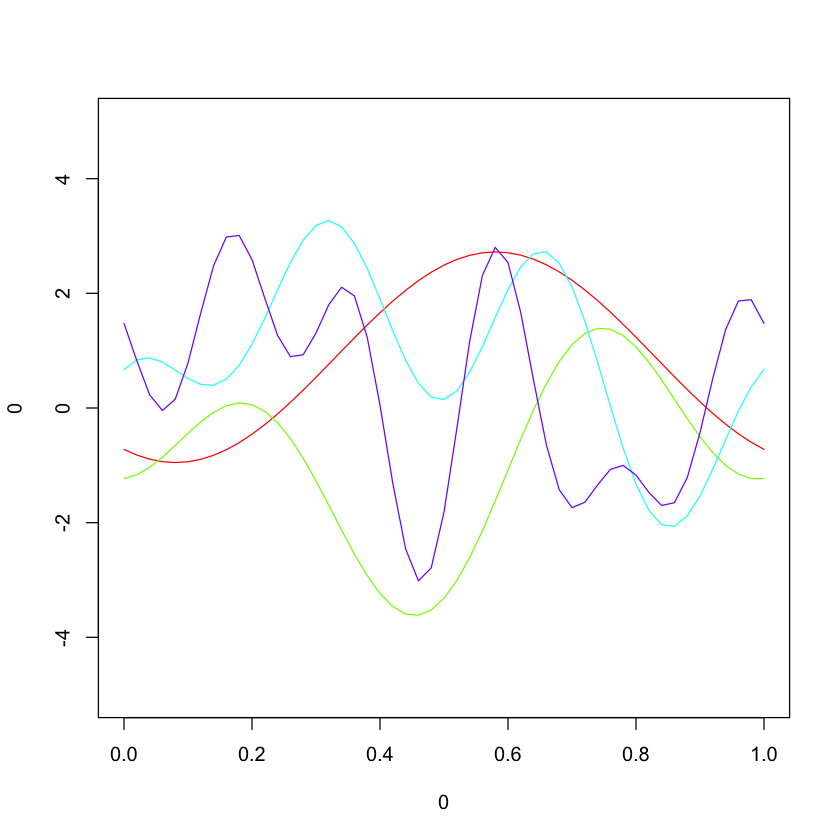

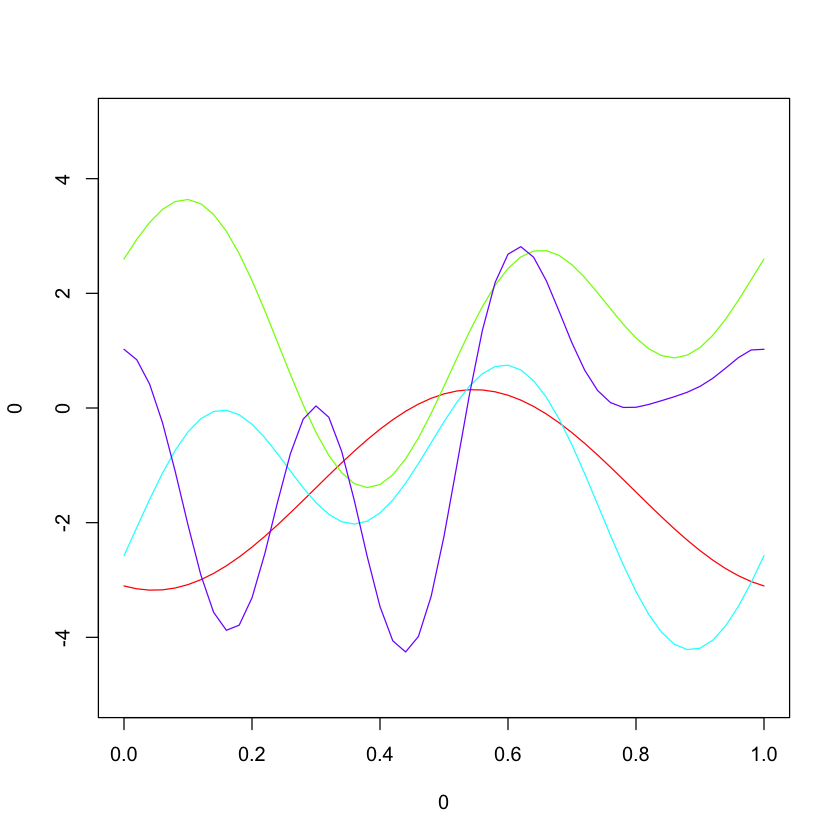

In [4]:
par(bg = "white")
plot(0,0,xlim=c(0,1),ylim=c(-5,5),type="n")

sel.crv <- sample(1:n, size=1, replace=FALSE)
color = rainbow(M)
#plot the functions from node 1

for(m in 1:M){
    
    lines(obs.time, data[[m]][sel.crv,1,], col=color[m])
}
#plot the functions from node 20
par(bg = "white")
plot(0,0,xlim=c(0,1),ylim=c(-5,5),type="n")
sel.crv <- sample(1:n, size=1, replace=FALSE)
color = rainbow(M)
for(m in 1:M){
    
    lines(obs.time, data[[m]][sel.crv,20,], col=color[m])
}